# Aprendizado não supervisionado

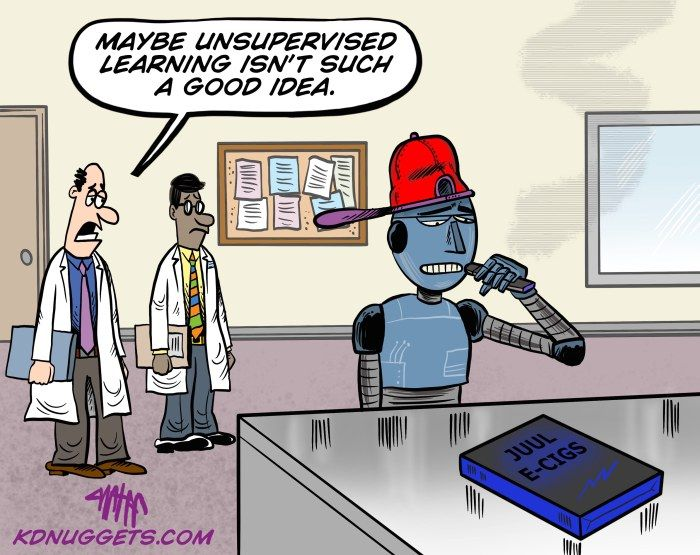

### Agrupamento de dados

Agrupamento de dados é o processo de encontrar, automaticamente, agrupamentos de dados que sejam similares
entre si.
- Trata-se de uma tarefa não supervisionada, pois não utiliza nenhum tipo de rótulo (ou variável dependente) disposto nos dados a respeito dos agrupamentos.
-  No módulo SciKit, agrupamento de dados pode ser realizado por meio do modulo **sklearn.cluster**.
- Algoritmos de agrupamento neste módulo apresentam o método **fit**, que infere os agrupamentos nos dados
    -  Pode ser visto como um treinamento, no caso do modelo ser
usado para inferir o grupo de novos dados.

### O algoritmo de agrupamento *k-means*

O K-means analisa amostras não rotuladas e tenta coloca-las em grupos que parecem estar relacionados. 
- O k em **k-means** representa o número de grupos (*clusters*) que você gostaria de ver impostos aos seus dados.
- O algoritmo organiza as amostras no número de grupos que você especifica com antecedência, usando cálculos de distância semelhantes ao algoritmo de agrupamento de k-vizinhos mais próximos. 
- Cada agrupamento de amostras é agrupado em torno de um **centróide** - o ponto central do agrupamento. 

    - Inicialmente, o algoritmo escolhe k centroides aleatoriamente a partir das amostras do conjunto de dados. 
    - Depois, o restante as amostras são colocadas no grupo cujo centróide é o mais próximo. 
    - Os centróides são iterativamente recalculados e as amostras reatribuídas aos clusters até, para todos os clusters, as distâncias de um dado centróide para as amostras em seu cluster são minimizados. 
    - Os resultados do algoritmo são:
        - uma matriz unidimensional de rótulos indicando o cluster para o qual cada amostra pertence 
        - uma matriz bidimensional de centróides que representam o centro de cada cluster.

#### Conjunto de dados Iris
Vamos trabalhar com o popular conjunto de dados *Iris* já presente no scikit-learn, que normalmente é analisados para classificação e agrupamento. 
- Embora este conjunto de dados seja rotulado, vamos **ignorar oss rótulos** aqui para demonstrar o agrupamento. Então, usaremos os rótulos para determinar quão bem o algoritmo k-means agrupou as amostras.

O conjunto de dados Iris tem apenas 150 amostras e quatro atributos. 
- O conjunto de dados descreve 50 amostras para cada uma das três espécies de flores de íris - Iris setosa, Iris versicolor e Iris virginica. 
- Os atributos de cada amostra são o comprimento da sépala, a largura da sépala, o comprimento da pétala e a largura da pétala, todos medidos em centímetros.
    - As sépalas são as partes externas maiores de cada flor que protegem as menores pétalas antes que os botões das flores desabrochem.

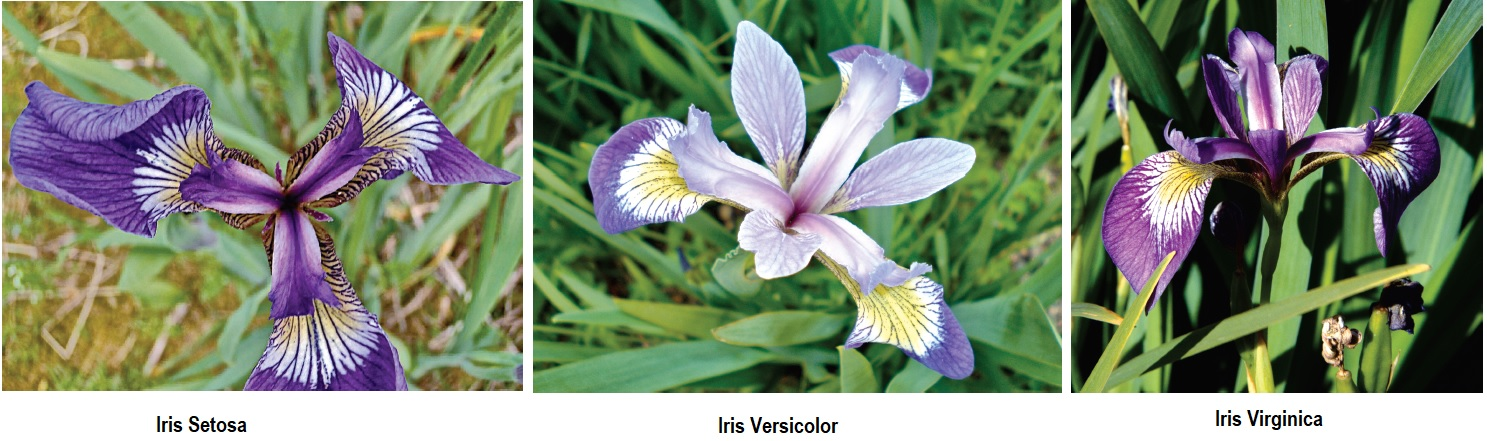

In [1]:
from sklearn.datasets import load_iris

In [2]:
%matplotlib notebook

In [3]:
iris = load_iris()

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

##### Verificando o tamanho dos conjuntos

In [5]:
iris.data.shape

(150, 4)

In [6]:
iris.target.shape

(150,)

O array target_names contém os nomes dos rótulos numéricos do array alvo

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

O array feature_names contém uma lista de nomes de strings para cada coluna no array de dados

In [8]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Explorando o conjunto de dados Iris: estatísticas descritivas com pandas
Vamos usar um DataFrame para explorar o conjunto de dados Iris. Como fizemos no caso da California Housing
estudo, vamos definir as opções do pandas para formatar as saídas baseadas em colunas:

In [9]:
import pandas as pd

In [10]:
pd.set_option('max_columns', 5)

In [11]:
pd.set_option('display.width', None)

Crie um DataFrame contendo o conteúdo da matriz de dados, usando o conteúdo do
array feature_names como os nomes das colunas:

In [12]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

Em seguida, adicione uma coluna contendo o nome de cada espécie de amostra. A compreensão da lista no
o snippet a seguir usa cada valor na matriz de destino para procurar as espécies correspondentes
nome na matriz target_names:

In [13]:
iris_df['species'] = [iris.target_names[i] for i in iris.target]

Vamos usar os pandas para ver alguns exemplos.

In [14]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Vamos calcular algumas estatísticas descritivas para as colunas numéricas:

In [15]:
pd.set_option('precision', 2)

In [16]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


Chamar o método de descrição na coluna 'specie' confirma que ele contém
três valores únicos. Aqui, sabemos com antecedência de trabalhar com esses dados que existem
três classes às quais as amostras pertencem, embora não seja o caso em aprendizado não supervisionado.

In [17]:
iris_df['species'].describe()

count           150
unique            3
top       virginica
freq             50
Name: species, dtype: object

## Visualizando o Conjunto de Dados com um gráfico de pares Seaborn

Vamos visualizar os recursos neste conjunto de dados. 
- Uma maneira de aprender mais sobre seus dados é ver como os atributos se relacionam uns com os outros.
- O conjunto de dados possui quatro atributos. Não podemos representar graficamente um contra os outros três em um único gráfico. 
    - No entanto, podemos traçar pares de recursos contra um outro. A seguir usamos a função **pairplot** do Seaborn para criar uma grade de plotagem de gráficos cada recurso contra si mesmo e os outros recursos especificados:


In [18]:
import seaborn as sns

In [19]:
sns.set(font_scale=1.1)

In [20]:
sns.set_style('whitegrid')

<IPython.core.display.Javascript object>


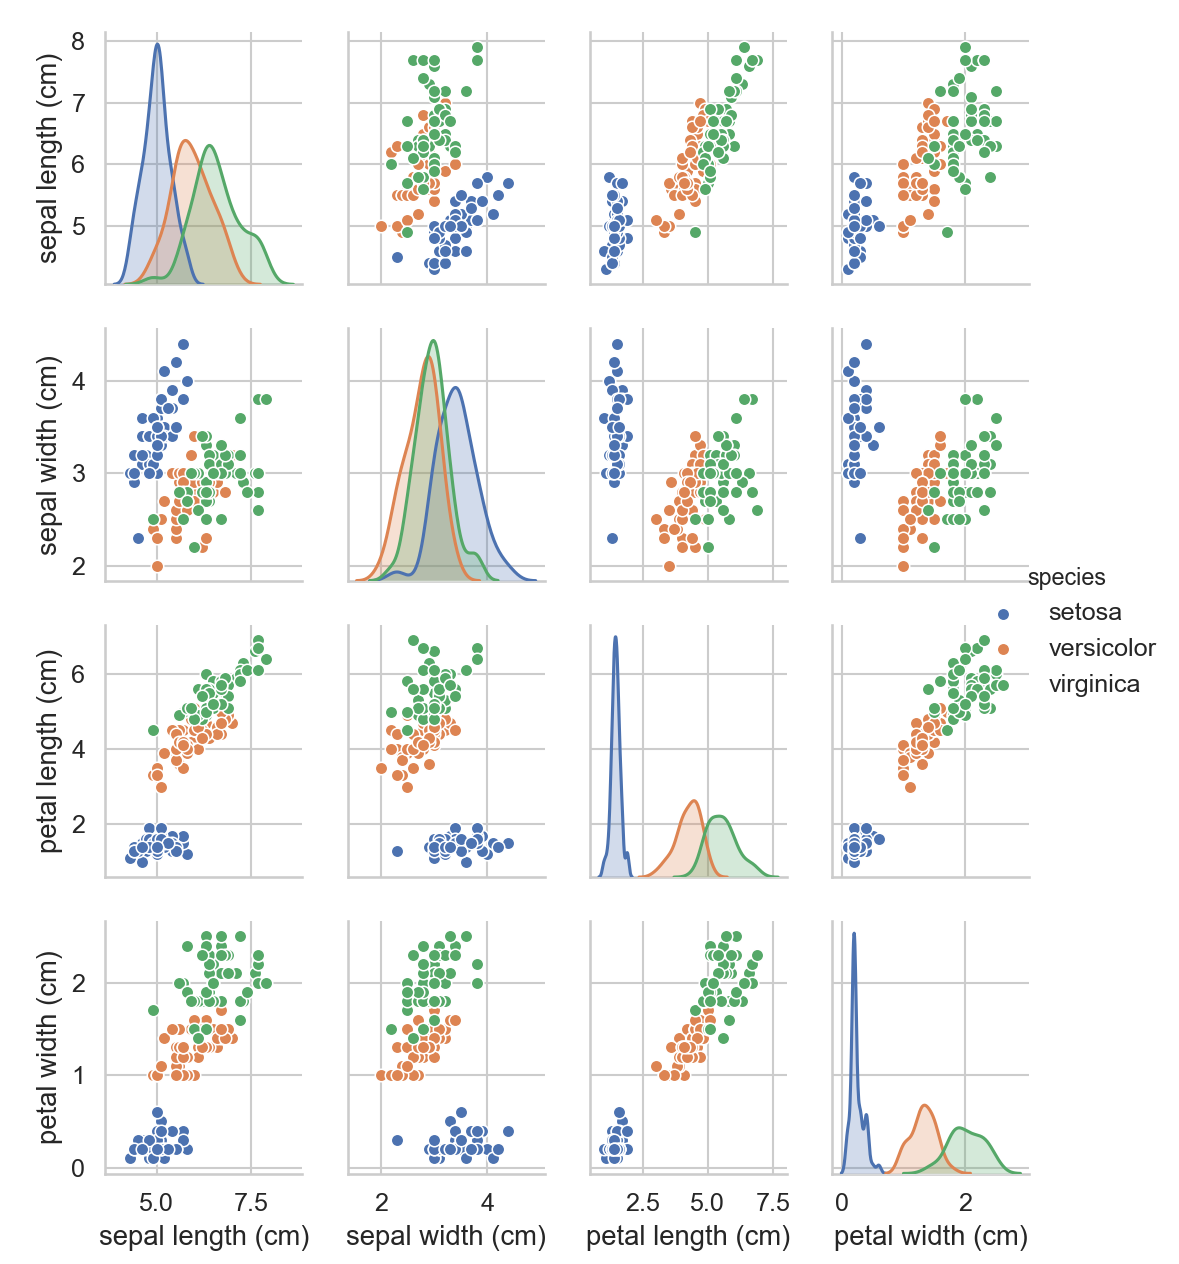

In [21]:
grid = sns.pairplot(data=iris_df, vars=iris_df.columns[0:4],hue='species')

#### Os argumentos da palavra-chave são:
- **data** - O **DataFrame** contendo os dados a serem plotados.
- **vars** - Uma sequência contendo os nomes das variáveis a serem plotadas. 
    - Para um **DataFrame**, esses são os nomes das colunas a serem plotadas. 
    - Aqui, usamos as quatro primeiras colunas, representando o comprimento da sépala, largura da sépala, comprimento da pétala e largura da pétala, respectivamente.
-  **hue** - A coluna do **DataFrame** que é usada para determinar as cores dos dados plotados.
- Neste caso, iremos colorir os dados por espécie de íris.

Os gráficos ao longo da diagonal principal, mostram a distribuição de apenas
um atributo. Por exemplo, considere as distribuições de comprimento de sépala:

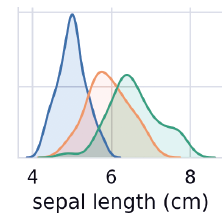

- A área sombreada em azul indica que a faixa de valores de comprimento de sépala (mostrado ao longo do eixo x) para a Iris setosa é de aproximadamente 4-6 centímetros e que a maioria das amostras de Iris setosa estão em no meio dessa faixa (aproximadamente 5 centímetros). 
- Da mesma forma, a área verde sombreada indica que a faixa de valores de comprimento de sépala para Iris virginica é de aproximadamente 4-8,5 centímetros 
- E a área laranja mostra que maioria das amostras de Iris virginica têm valores de comprimento de sépala entre 6 e 7 centímetros.

Os outros gráficos em uma coluna mostram **gráficos de dispersão** dos outros atributos em relação ao atributo no eixo x. 
- Usando cores separadas para cada espécie de íris, é possível ver como as espécies se relacionam umas com as outras, considerando pares de atributos. 
     - Curiosamente, todos os gráficos de dispersão separam claramente a Iris Setosa (pontos azuis) dos pontos laranja e verdes de outras espécies, indicando que Iris setosa é na verdade, em uma *"classe por si só"*. 
     Também podemos ver que as outras duas espécies às vezes podem ser confundidas umas com as outras, como indicado pelos pontos laranja e verdes sobrepostos. 
     - Por  exemplo, se você olhar o gráfico de dispersão para largura da sépala vs. comprimento da sépala, você verá o os pontos referentes à Iris Versicolor e à Iris Virginica são misturados. Isso indica que seria difícil distinguir entre essas duas espécies se tivéssemos apenas as medidas sépalas disponíveis para nos.

## Usando um Estimador KMeans

Nesta seção, usaremos o agrupamento k-means por meio do estimador KMeans do **scikit-learn** (do módulo **sklearn.cluster**) para colocar cada amostra do conjunto de dados Iris em um cluster. 
- Como com os outros estimadores que você usou, o estimador KMeans esconde de você os detalhes matemáticos do algoritmo, tornando-o fácil de usar.

### Criando o Estimador
Vamos criar o objeto KMeans:



In [22]:
from sklearn.cluster import KMeans

In [23]:
kmeans = KMeans(n_clusters=3, random_state=11)

O argumento de palavra-chave **n_clusters** especifica o hiperparâmetro do algoritmo de agrupamento *k-means*, k, que o **KMeans** requer para calcular os grupos e rotular cada amostra. 
- Quando você treina um estimador **KMeans**, o algoritmo calcula para cada agrupamento um centroide que representa o ponto de dados central do cluster.
- O valor padrão para o parâmetro **n_clusters** é 8. 
    - Frequentemente, você dependerá de especialistas no domínio com conhecimento sobre os dados para ajudar a escolher um valor k apropriado. 
    - Contudo, com o ajuste de hiperparâmetros, você pode estimar o k apropriado.
    
Nesse caso usaremos **n_clusters = 3** para ver o quão bem KMeans faz na rotulagem das amostras de íris. 

### Ajustando o modelo
A seguir, treinaremos o estimador chamando o método de ajuste do objeto KMeans. Esta etapa realiza o algoritmo [k-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) discutido anteriormente:

In [24]:
kmeans.fit(iris.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=11, tol=0.0001, verbose=0)

#### Quando o treinamento é concluído, o objeto KMeans contém:
- Uma matriz **labels_** com valores de 0 a n_clusters - 1 (neste exemplo, 0–2),
indicando os clusters aos quais as amostras pertencem.
- Um **cluster_centers_** array em que cada linha representa um centróide.

#### Comparando os rótulos do agrupamento com os valores de classe do conjunto de dados Iris

Como o conjunto de dados Iris é rotulado, podemos olhar seus valores de matriz de destino para ter uma noção de quão bem o algoritmo k-means agrupou as amostras para as três espécies de Iris. 

<font color=red>Sem os rótulos dos, precisaríamos depender de um especialista em domínio para ajudar a avaliar se as classes fazem sentido.</font>

Neste conjunto de dados, as primeiras 50 amostras são Iris setosa, as próximas 50 são Iris versicolor e as os últimos 50 são Iris virginica. 

A matriz de destino do conjunto de dados Iris os representa com os valores 0–2. Se o estimador KMeans escolheu os clusters perfeitamente, então cada grupo de 50 elementos em a matriz **labels_** do estimador deve ter um rótulo distinto. Conforme você estuda os resultados abaixo,
observe que o estimador KMeans usa os valores de 0 a k - 1 para rotular os clusters, mas estes
não estão relacionados à matriz de destino do conjunto de dados Iris.

Vamos usar o fatiamento para ver como cada grupo de 50 amostras de íris foi agrupado. Os seguintes
snippet mostra que as primeiras 50 amostras foram todas colocadas no cluster 1:

In [25]:
print(kmeans.labels_[0:50])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


As próximas 50 amostras devem ser colocadas em um segundo cluster. O seguinte snippet
mostra que a maioria foi colocada no cluster 0, mas duas amostras foram colocadas no cluster 2:

In [26]:
print(kmeans.labels_[50:100])

[0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


Da mesma forma, as últimas 50 amostras devem ser colocadas em um terceiro cluster. Os seguintes
snippet mostra que muitas dessas amostras foram colocadas no cluster 2, mas 14 das amostras
foram colocados no cluster 0, indicando que o algoritmo pensou que eles pertenciam a um diferente
grupo:

In [27]:
print(kmeans.labels_[100:150])

[2 0 2 2 2 2 0 2 2 2 2 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2
 2 0 2 2 2 0 2 2 2 0 2 2 0]


Os resultados desses três trechos confirmam o que vimos nos diagramas de pareamento anterior
nesta seção - que Iris setosa está "em uma classe por si só" e que há alguma confusão
entre Iris versicolor e Iris virginica.

In [28]:
from sklearn import cluster, datasets
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X_iris = iris.data

X_iris3D = X_iris[:,0:3] # todas as linhas e as colunas 0, 1 e 2.

k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X_iris3D)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

<IPython.core.display.Javascript object>


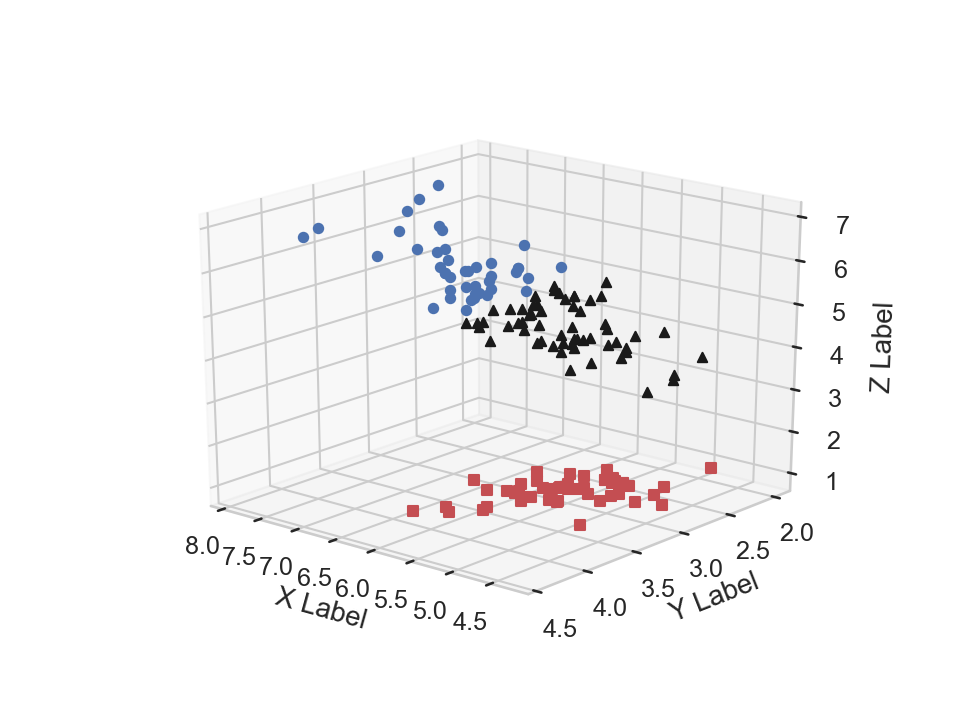

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') # 111 corresponde às coordendas i,j,k de possíveis subfiguras.
color = ['r','b','k'] # marcadores de cor
mark = ['s','o','^'] # marcadores simbólicos
for i in range(len(X_iris3D)):
    ax.scatter(X_iris3D[i][0],X_iris3D[i][1],X_iris3D[i][2],c=color[k_means.labels_[i]],marker=mark[k_means.labels_[i]])
ax.set_xlabel('X Label') # rótulos dos eixos
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

**Exercício** - Utilize [outro algoritmo de agrupamento](http://scikit-learn.org/stable/modules/clustering.html), para agrupar os
mesmos dados do exemplo anterior. Verifique se o resultado
será o mesmo.

### Avaliação de agrupamento
- Por tartar-se de uma tarefa não supervisionada, avaliar a performance de algoritmos de agrupamento não é tão trivial quanto a contagem do número de erros.
- As formas de avaliação devem considerar o fato que em agrupamentos de dados, membros pertencentes a um grupo são mais similares entre sí do que membros pertencentes a outros grupos. 
    - De acordo com alguma medida de similaridade.

#### Exemplos de medidas
- Medidas de análise de agrupamentos.
    - Não consideram a comparação com possíveis ‘verdades absolutas’
    - Analisam a qualidade dos agrupamentos obtidos (agrupamentos bem definidos).
- Métodos no Scikit
    - Coeficiente de silhueta
    - Índice Calinski-Harabaz

### O coeficiente de silhueta
-  O coeficiente de silhueta é definido para cada instância de dado e é composta por dois valores:
   
   – a: A distância média entre uma determinada instância de dado e as demais instâncias do mesmo grupo.
   – b: A distância média entre uma determinada instância às instâncias pertencentes ao agrupamento mais próximo.
- O coeficiente de silhueta, s, para uma instância de dados é: 

<center> $s =\frac{b-a}{max(a,b)}$ </center>

> O coeficiente de silhuetas para o agrupamento é a média dos
Coeficientes das instâncias. Quanto maior o coeficiente, melhor!

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_iris3D)
    silhouette_avg = silhouette_score(X_iris3D, cluster_labels)
    print("Para n_clusters =", n_clusters, "O coeficiente de silhoueta é :", silhouette_avg)

Para n_clusters = 2 O coeficiente de silhoueta é : 0.6845068276197064
Para n_clusters = 3 O coeficiente de silhoueta é : 0.5498955810221875
Para n_clusters = 4 O coeficiente de silhoueta é : 0.5083197879690337
Para n_clusters = 5 O coeficiente de silhoueta é : 0.48778868059511105
Para n_clusters = 6 O coeficiente de silhoueta é : 0.37083008212597807
